In [1]:
#Import libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.optimize as opt

In [2]:
#Get data
data = pd.read_csv("C:/Users/LoadinG/Desktop/s.txt",names = ["Exam1","Exam2","Accepted"])
data.insert(0, 'Ones', 1)

In [3]:
#Separated classes
Pos = data[data["Accepted"].isin([1])]
Neg = data[data["Accepted"].isin([0])]

Text(0, 0.5, 'Exam 2')

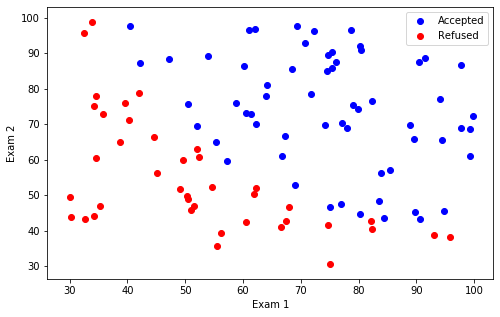

In [4]:
#Draw 2 classes
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(Pos["Exam1"], Pos['Exam2'] ,c='b', label='Accepted')
ax.scatter(Neg['Exam1'], Neg['Exam2'] ,c='r', label='Refused')
ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

In [5]:
#H(theta) func
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

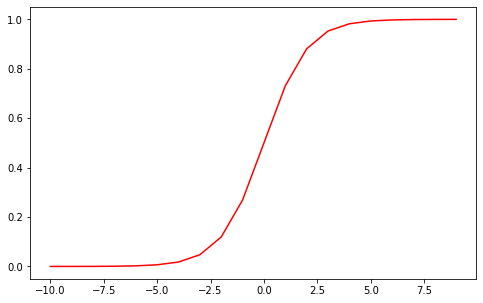

In [6]:
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(nums, sigmoid(nums), 'r')

In [16]:
X[:6]

matrix([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ],
        [ 1.        , 79.03273605, 75.34437644],
        [ 1.        , 45.08327748, 56.31637178]])

In [17]:
Y[:6]

matrix([[0],
        [0],
        [0],
        [1],
        [1],
        [0]], dtype=int64)

In [18]:
theta

matrix([[0., 0., 0.]])

In [30]:
np.zeros(3)

array([0., 0., 0.])

In [19]:
#Convert data to array
X = data.iloc[:,:-1]
X = np.array(X.values)
Y = data.iloc[:,-1:]
Y = np.array(Y.values)
theta = np.matrix(np.zeros(3))

In [28]:
X[:6]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178]])

In [29]:
Y[:6]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0]], dtype=int64)

In [31]:
#Cost func
def cost(theta, X, Y):
    first = np.multiply(-Y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - Y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [32]:
#First value of cost
cost(theta,X,Y)

0.6931471805599453

In [33]:
#Gradient descent func
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = len(theta.T)
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

In [34]:
#Optimal Cost
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, Y))
cost(result[0],X,Y)

1.9896780400081502

In [35]:
#Accuracy func
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 60%
